# Cross-Entropy Method

In [1]:
import numpy as np
from collections import deque
import matplotlib.pyplot as plt

from sympy import *
%matplotlib inline

In [3]:
def calculate(x1, y1):
    x = Symbol('x')
    y = Symbol('y')
    amp = (
        cos(pi*x)/16 
        - cos(3*pi*x)/16 
        - cos(pi*(x - 4*y))/32 
        + cos(pi*(x - 2*y))/8 
        - cos(pi*(x + 2*y))/8 
        - cos(pi*(x + 4*y))/32 
        + cos(pi*(2*x - 2*y))/8 
        - cos(pi*(2*x + 2*y))/8 
        + cos(pi*(3*x - 4*y))/32 
        + cos(pi*(3*x + 4*y))/32 
        + 1/4
    )
    f = lambdify([x, y], amp)
    return f(x1, y1)


Episode 1	Average Score: 0.73
[-1.69821099  0.14848067] with reward: 0.7276366654355905
Episode 2	Average Score: 0.79
[-1.65496048  0.24532418] with reward: 0.8600664581852699
Episode 3	Average Score: 0.82
[-1.65496048  0.24532418] with reward: 0.8600664581852699
Episode 4	Average Score: 0.83
[-1.72121572  0.2733504 ] with reward: 0.8680855151898
Episode 5	Average Score: 0.84
[-1.68045489  0.2490728 ] with reward: 0.8784616388107683
Episode 6	Average Score: 0.85
[-1.70170894  0.25535625] with reward: 0.8818350491238909
Episode 7	Average Score: 0.85
[-1.69876665  0.24858923] with reward: 0.8823518183308648
Episode 8	Average Score: 0.86
[-1.69876665  0.24858923] with reward: 0.8823518183308648
Episode 9	Average Score: 0.86
[-1.69940372  0.25004743] with reward: 0.882383004506741
Episode 10	Average Score: 0.86
[-1.69911656  0.25005443] with reward: 0.8823846640727007
Episode 11	Average Score: 0.86
[-1.69899764  0.25001317] with reward: 0.8823848539527395
Episode 12	Average Score: 0.86
[-1

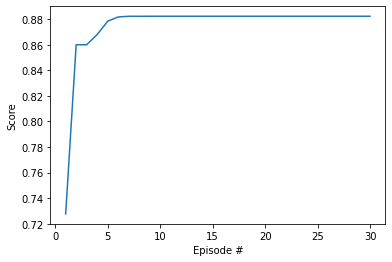

In [4]:
def cem(n_iterations=30, print_every=1, pop_size=50, elite_frac=0.2):
    n_elite=int(pop_size*elite_frac)

    scores_deque = deque(maxlen=100)
    scores = []
    best_weight = [-1, 0]
    mean = [-1, 0]
    cov = [[0.1, 0], [0, 0.1]] 
    for i_iteration in range(1, n_iterations+1):
        points = np.random.multivariate_normal(mean, cov, size=pop_size)
        points = np.concatenate((points, [best_weight]), axis=0)
        # ys = np.random.normal(y_mean, 0.04, size=50)
        # print(weights_pop)
        rewards = np.array([calculate(x, y) for x, y in points])

        elite_idxs = rewards.argsort()[-n_elite:]
        elite_weights = [points[i] for i in elite_idxs]

        # print(elite_weights)
        best_weight = elite_weights[-1]

        reward = calculate(*best_weight)
        scores_deque.append(reward)
        scores.append(reward)
        mean = np.mean(elite_weights, axis=0)
        cov = np.cov(np.stack((elite_weights), axis = 1))

        if i_iteration % print_every == 0:
            # print(mean)
            # print(cov)
            print('Episode {}\tAverage Score: {:.2f}'.format(i_iteration, np.mean(scores_deque)))
            print(f'{best_weight} with reward: {calculate(*best_weight)}')

    return scores

scores = cem()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [95]:
mean = [-1, 0]
cov = [[0.1, 0], [0, 0.5]] 
points = np.random.multivariate_normal(mean, cov, size=10)
points = np.concatenate((points, [[-1, 0]]), axis=0)
print(points)

[[-1.7492568  -0.41887665]
 [-1.39948657  1.0197703 ]
 [-1.42756965 -0.64481194]
 [-1.85964161 -0.07583525]
 [-0.64997147  0.28281554]
 [-0.87279722  0.32623821]
 [-1.25009165  0.22612605]
 [-1.50392018  1.04851025]
 [-1.22328637 -0.22196682]
 [-0.68457345 -0.32581546]
 [-1.          0.        ]]
